In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization

# Load preprocessed data
X = np.load('/content/drive/MyDrive/mini project/X.npy')
y = np.load('/content/drive/MyDrive/mini project/y.npy')

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build xLSTM Model
def build_xlstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, activation='tanh', input_shape=input_shape),
        LayerNormalization(),
        Dropout(0.2),
        LSTM(64, return_sequences=False, activation='tanh'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model
model = build_xlstm_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save trained model
model.save('xlstm_model.h5')
print("Model saved as 'xlstm_model.h5'.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0654 - val_loss: 0.0032
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

Model saved as 'xlstm_model.h5'.


In [8]:
import tensorflow as tf

# Load the model with custom loss function
model = tf.keras.models.load_model("xlstm_model.h5", compile=False)

# Compile the model with explicit loss function
model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 128)             │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 50, 128)             │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,337 (462.25 KB)

 Trainable params: 118,337 (462.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import numpy as np
print("X shape:", np.load("/content/drive/MyDrive/mini project/X.npy").shape)
print("y shape:", np.load("/content/drive/MyDrive/mini project/y.npy").shape)


X shape: (2466, 50, 5)
y shape: (2466,)


In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.9764e-04 - val_loss: 0.0046
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 8.5026e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9547e-04 - val_loss: 0.0021
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2090e-04 - val_loss: 8.0120e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2302e-04 - val_loss: 8.8242e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━

In [12]:
model.save("xlstm_model.h5", save_format="tf")


In [13]:
# Save the model in the new Keras format
model.save("xlstm_model.keras")

# If you still want the legacy HDF5 format, this works:
model.save("xlstm_model.h5")


In [14]:
import os
print("Model file size:", os.path.getsize("xlstm_model.keras") / (1024 * 1024), "MB")


Model file size: 1.3937292098999023 MB


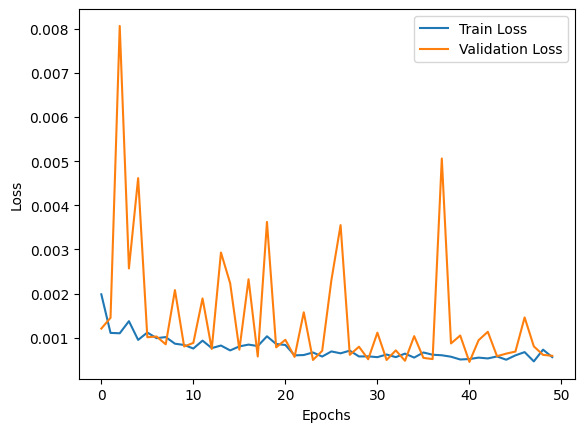

In [15]:
import matplotlib.pyplot as plt

history_dict = model.history.history  # Get loss history
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2687 - val_loss: 0.0224
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0114 - val_loss: 0.0030
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.0084
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

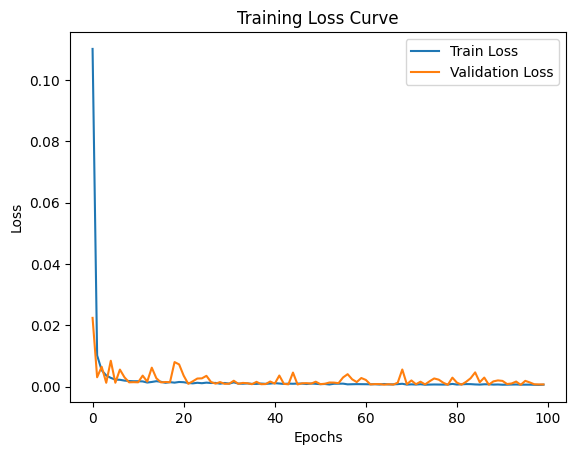

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization

# Load Preprocessed Data
X = np.load('/content/drive/MyDrive/mini project/X.npy')
y = np.load('/content/drive/MyDrive/mini project/y.npy')

# Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build Enhanced xLSTM Model
def build_xlstm_model(input_shape):
    model = Sequential([
        LSTM(256, return_sequences=True, activation='tanh', input_shape=input_shape),
        LayerNormalization(),
        Dropout(0.3),
        LSTM(128, return_sequences=False, activation='tanh'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train Model
model = build_xlstm_model((X_train.shape[1], X_train.shape[2]))
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Save Model
model.save("xlstm_model.keras")
print("Model saved as xlstm_model.keras")

# Plot Training Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curve')
plt.savefig('training_loss_plot.png')
plt.show()


In [19]:
mv training_loss_plot.png /content/drive/MyDrive/mini\ project/

In [20]:
mv xlstm_model.keras /content/drive/MyDrive/mini\ project/